In [ ]:
!pip install ta
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from sklearn import preprocessing
from ta.volatility import BollingerBands
from ta.trend import MACD
from ta.momentum import RSIIndicator
from keras.models import Sequential
from keras.layers import Conv1D,MaxPool1D,Bidirectional,LSTM,Dropout,TimeDistributed
from keras.layers import Dense,GlobalAveragePooling2D
from ta.trend import IchimokuIndicator
from sklearn.linear_model import LinearRegression
from keras.layers import Conv1D,Flatten,MaxPooling1D,Bidirectional,LSTM,Dropout,TimeDistributed,MaxPool2D
from keras.layers import Dense,GlobalAveragePooling2D
import matplotlib.pyplot as plt
import yfinance as yf

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Download stock data from yfinance
def download_stock(stock):
    df = yf.download(
        [stock],
        start="2010-01-01",
        end="2024-01-01",
        group_by="ticker",
        progress=False
    )
    df.round(4)
    return df
apple_stocks = download_stock("AAPL")
apple_stocks

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.470741,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.481929,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.378826,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.367032,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.409364,447610800
...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.353287,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.803986,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.903839,48087700


In [ ]:
from ta.trend import IchimokuIndicator
from ta.volatility import BollingerBands
from ta.trend import MACD
from ta.momentum import RSIIndicator

indicator_bb = BollingerBands(close=apple_stocks["Close"])
macd = MACD(close=apple_stocks["Close"])
rsi = RSIIndicator(close=apple_stocks["Close"])
ichi = IchimokuIndicator(high=apple_stocks["High"],low=apple_stocks["Low"])

apple_stocks['macd'] = macd.macd()
apple_stocks['rsi'] = rsi.rsi()
apple_stocks['bb_bbm'] = indicator_bb.bollinger_mavg()
apple_stocks['bb_bbh'] = indicator_bb.bollinger_hband()
apple_stocks['bb_bbl'] = indicator_bb.bollinger_lband()
apple_stocks['ichi_a'] = ichi.ichimoku_a()
apple_stocks['ichi_b'] = ichi.ichimoku_b()
apple_stocks['ichi_base'] = ichi.ichimoku_base_line()
apple_stocks['ichi_conv'] = ichi.ichimoku_conversion_line()
apple_stocks = apple_stocks.fillna(0)

def create_moving_average(df, moving_average_days=[50, 100, 200]):
  for moving_average in moving_average_days:
    for company in df:
      column_name = f'Moving Average for {moving_average} days'
      df[column_name] = df["Close"].rolling(moving_average).mean()
  return df.iloc[max(moving_average_days):]

apple_stocks = create_moving_average(apple_stocks)
apple_stocks

,Open,High,Low,Close,Adj Close,Volume,macd,rsi,bb_bbm,bb_bbh,bb_bbl,ichi_a,ichi_b,ichi_base,ichi_conv,Moving Average for 50 days,Moving Average for 100 days,Moving Average for 200 days
Date,,,,,,,,,,,,,,,,,,
2010-10-19,10.835714,11.206071,10.715000,11.053214,9.357644,1232784000,0.382695,70.061930,10.498732,11.228973,9.768491,10.628839,9.902857,10.437857,10.819821,9.693457,9.463275,8.784248
2010-10-20,11.035714,11.223214,10.959643,11.090357,9.389089,721624400,0.381549,70.678640,10.539411,11.305430,9.773392,10.677143,9.902857,10.479285,10.875000,9.729971,9.482436,8.801418
2010-10-21,11.155714,11.240714,10.957143,11.054286,9.358555,551460000,0.373426,69.188061,10.576196,11.366537,9.785856,10.714196,9.902857,10.508928,10.919464,9.772350,9.499825,8.819016
2010-10-22,11.038214,11.072857,10.939286,10.981071,9.296569,372778000,0.356966,66.139105,10.603250,11.409962,9.796538,10.751518,9.902857,10.583571,10.919464,9.812121,9.515368,8.836318
2010-10-25,11.038929,11.128571,11.015714,11.030000,9.337992,392462000,0.343905,67.179997,10.634821,11.456309,9.813334,10.828571,9.902857,10.607143,11.050000,9.854793,9.531696,8.853614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.353287,37122800,2.636317,54.609714,193.668501,199.343118,187.993883,194.602497,182.644997,193.534996,195.669998,185.398801,181.768301,178.649100
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.803986,28919300,2.306308,53.026883,193.831501,199.231774,188.431228,194.879997,182.644997,193.534996,196.224998,185.682801,181.787101,178.871851
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.903839,48087700,2.029448,53.291938,193.969001,199.148303,188.789699,194.444996,182.644997,193.534996,195.354996,185.971400,181.898701,179.085250


In [ ]:
from sklearn.model_selection import train_test_split

df = apple_stocks
X = []
Y = []
window_size=100
for i in range(1 , len(df) - window_size -1 , 1):
    first = df.iloc[i,2]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df.iloc[i + j, 2] - first) / first)
    temp2.append((df.iloc[i + window_size, 2] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

2898
322


In [ ]:
# For creating model and training
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.layers import MaxPooling1D, Flatten
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.metrics import RootMeanSquaredError

model = tf.keras.Sequential()

# Creating the Neural Network model here...
# CNN layers
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu', input_shape=(None, 100, 1))))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(128, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Flatten()))
# model.add(Dense(5, kernel_regularizer=L2(0.01)))

# LSTM layers
model.add(Bidirectional(LSTM(100, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(100, return_sequences=False)))
model.add(Dropout(0.5))

#Final layers
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

history = model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=100, batch_size=40, verbose=1, shuffle =True)

Epoch 1/100
73/73 [==============================] - 13s 33ms/step - loss: 0.0128 - mse: 0.0128 - mae: 0.0814 - val_loss: 0.0071 - val_mse: 0.0071 - val_mae: 0.0641
Epoch 2/100
73/73 [==============================] - 1s 9ms/step - loss: 0.0056 - mse: 0.0056 - mae: 0.0568 - val_loss: 0.0046 - val_mse: 0.0046 - val_mae: 0.0509
Epoch 3/100
73/73 [==============================] - 1s 9ms/step - loss: 0.0050 - mse: 0.0050 - mae: 0.0537 - val_loss: 0.0043 - val_mse: 0.0043 - val_mae: 0.0495
Epoch 4/100
73/73 [==============================] - 1s 9ms/step - loss: 0.0044 - mse: 0.0044 - mae: 0.0506 - val_loss: 0.0038 - val_mse: 0.0038 - val_mae: 0.0462
Epoch 5/100
73/73 [==============================] - 1s 9ms/step - loss: 0.0042 - mse: 0.0042 - mae: 0.0494 - val_loss: 0.0039 - val_mse: 0.0039 - val_mae: 0.0473
Epoch 6/100
73/73 [==============================] - 1s 9ms/step - loss: 0.0044 - mse: 0.0044 - mae: 0.0508 - val_loss: 0.0050 - val_mse: 0.0050 - val_mae: 0.0536
Epoch 7/100
73/73 [=

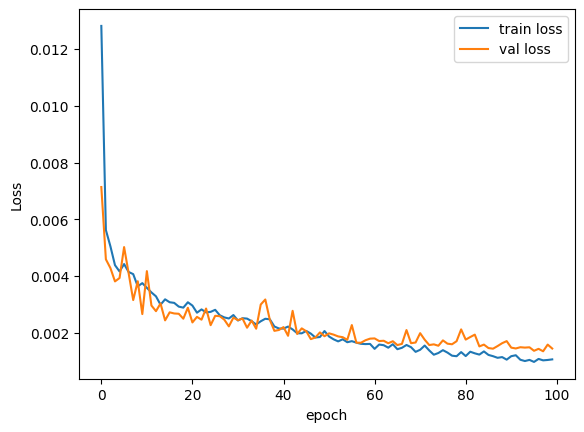

In [ ]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

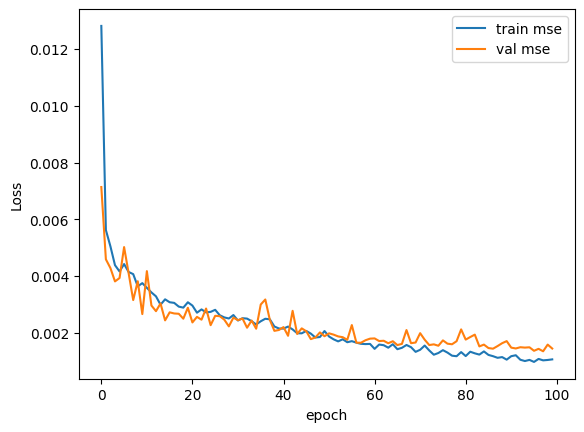

In [ ]:
plt.plot(history.history['mse'], label='train mse')
plt.plot(history.history['val_mse'], label='val mse')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

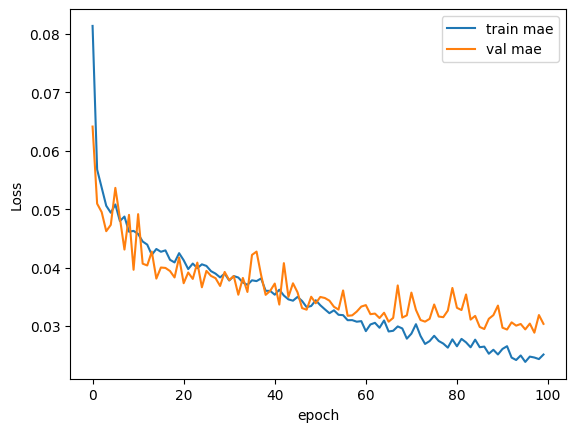

In [ ]:
plt.plot(history.history['mae'], label='train mae')
plt.plot(history.history['val_mae'], label='val mae')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDist  (None, 1, 98, 64)         256       
 ributed)                                                        
                                                                 
 time_distributed_1 (TimeDi  (None, 1, 49, 64)         0         
 stributed)                                                      
                                                                 
 time_distributed_2 (TimeDi  (None, 1, 47, 128)        24704     
 stributed)                                                      
                                                                 
 time_distributed_3 (TimeDi  (None, 1, 23, 128)        0         
 stributed)                                                      
                                                                 
 time_distributed_4 (TimeDi  (None, 1, 21, 64)         2

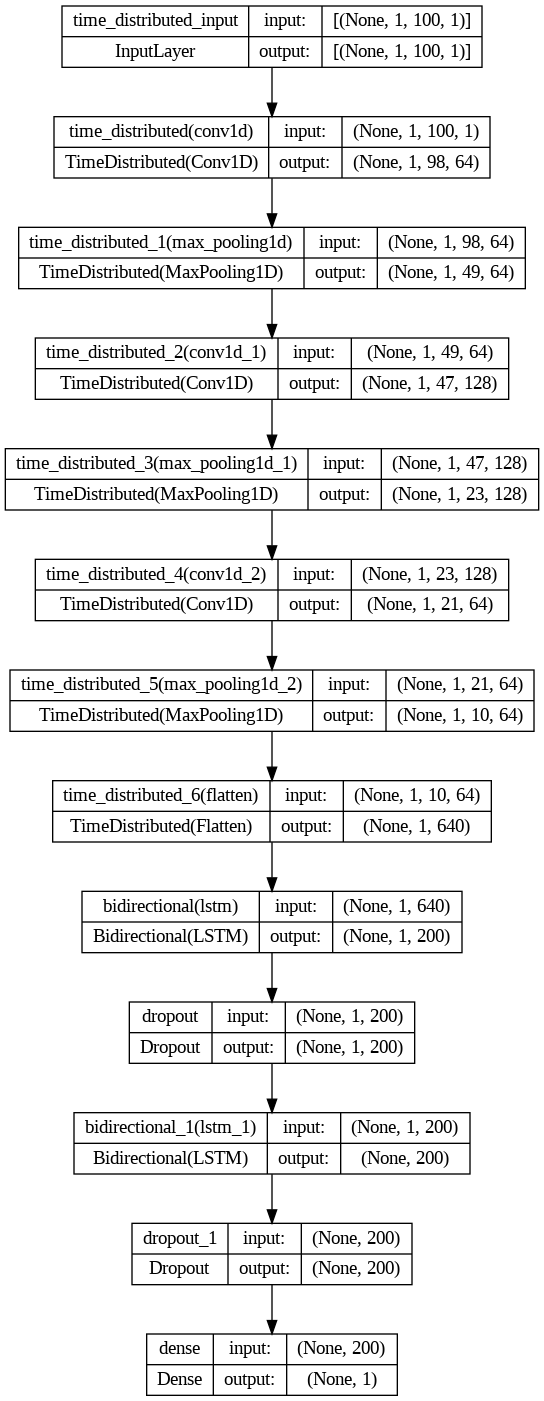

In [ ]:
# After the model has been constructed, we'll summarise it
from tensorflow.keras.utils import plot_model
print(model.summary())
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.evaluate(test_X, test_Y)

11/11 [==============================] - 0s 4ms/step - loss: 0.0014 - mse: 0.0014 - mae: 0.0304


[0.001447764690965414, 0.001447764690965414, 0.030365008860826492]

In [ ]:
from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

# predict probabilities for test set
yhat_probs = model.predict(test_X, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

var = explained_variance_score(test_Y.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)

r2 = r2_score(test_Y.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % var)

var2 = max_error(test_Y.reshape(-1,1), yhat_probs)
print('Max Error: %f' % var2)

Variance: 0.958800
R2 Score: 0.958800
Max Error: 0.115470


11/11 [==============================] - 0s 3ms/step


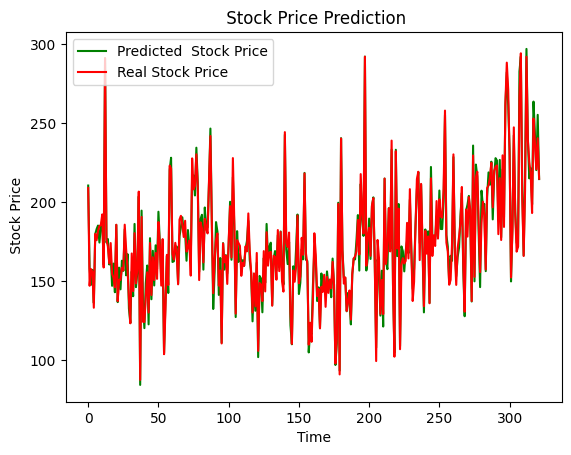

In [ ]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = df.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()